In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data1.csv")
data['stats'] = data['stats'].apply(ast.literal_eval)
stats_df = pd.json_normalize(data['stats'])
data = pd.concat([data.drop(columns=['stats']), stats_df], axis=1)

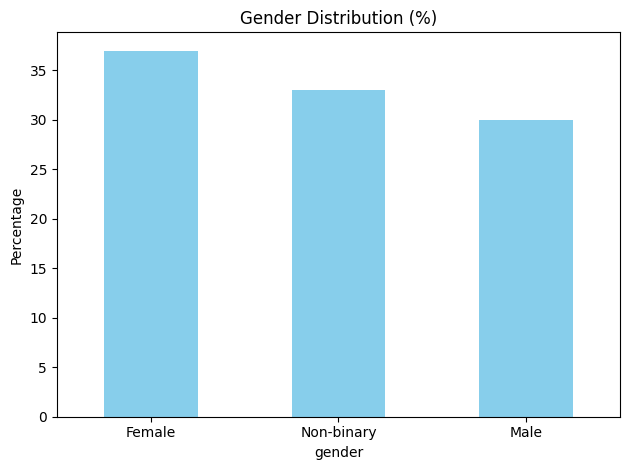

In [3]:
#  Explore Gender Distribution 
gender_counts = data['gender'].value_counts(normalize=True) * 100
gender_counts.plot(kind='bar', title='Gender Distribution (%)', color='skyblue')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


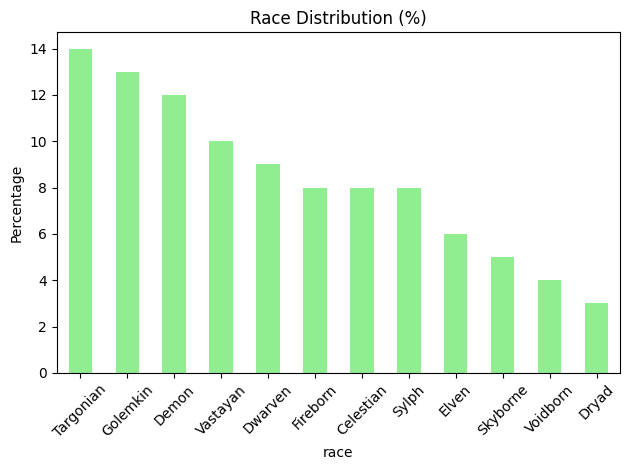

In [4]:
# Explore Race Distribution 
race_counts = data['race'].value_counts(normalize=True) * 100
race_counts.plot(kind='bar', title='Race Distribution (%)', color='lightgreen')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

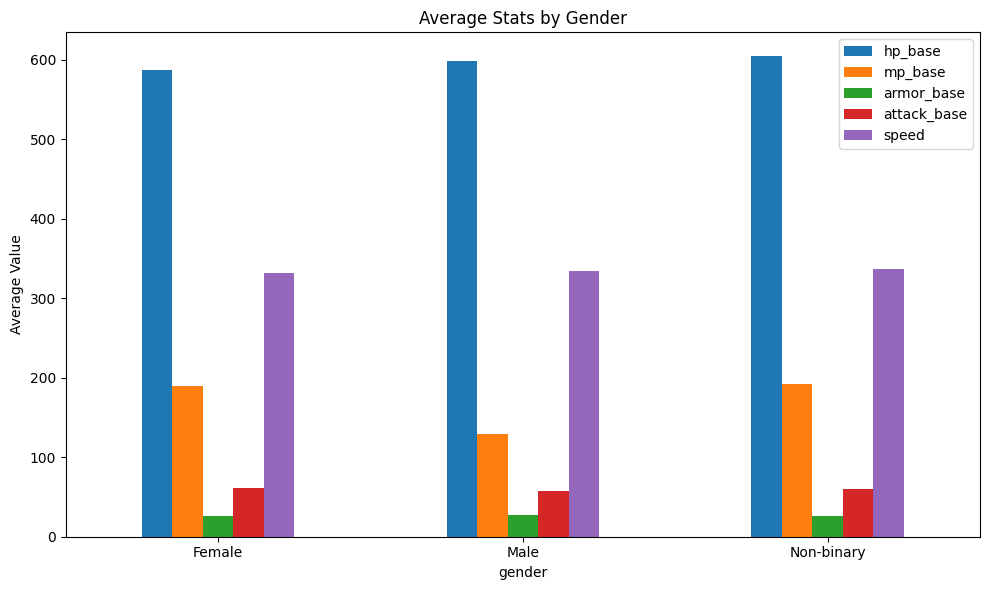

In [5]:
# Analyze Average Stats by Gender 
gender_stats = data.groupby('gender')[['hp_base', 'mp_base', 'armor_base', 'attack_base', 'speed']].mean()
gender_stats.plot(kind='bar', figsize=(10, 6), title='Average Stats by Gender')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

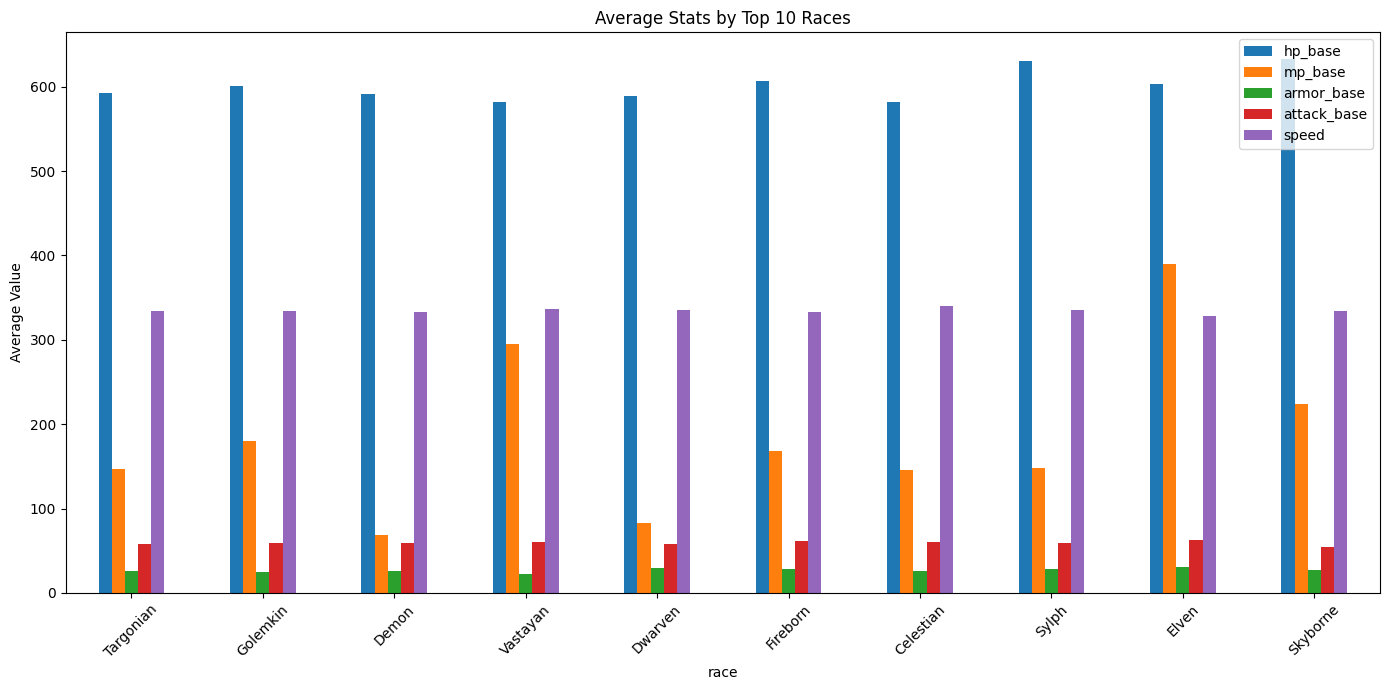

In [6]:

# Analyze Average Stats by Top 10 Races
top_races = data['race'].value_counts().head(10).index
race_stats = data.groupby('race')[['hp_base', 'mp_base', 'armor_base', 'attack_base', 'speed']].mean()
race_stats.loc[top_races].plot(kind='bar', figsize=(14, 7), title='Average Stats by Top 10 Races')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

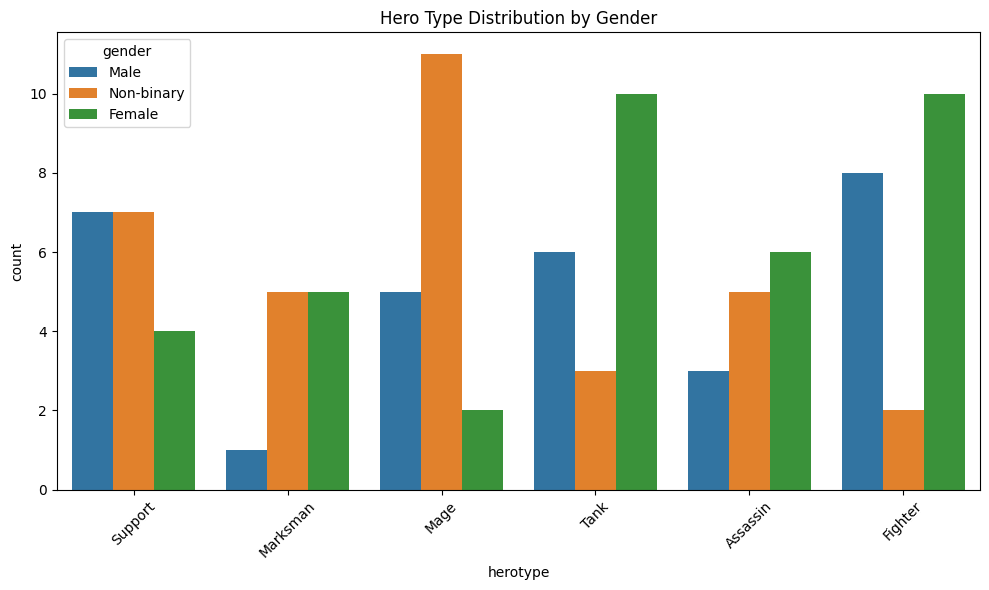

In [7]:
#   Gender vs Hero Type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='herotype', hue='gender')
plt.title('Hero Type Distribution by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

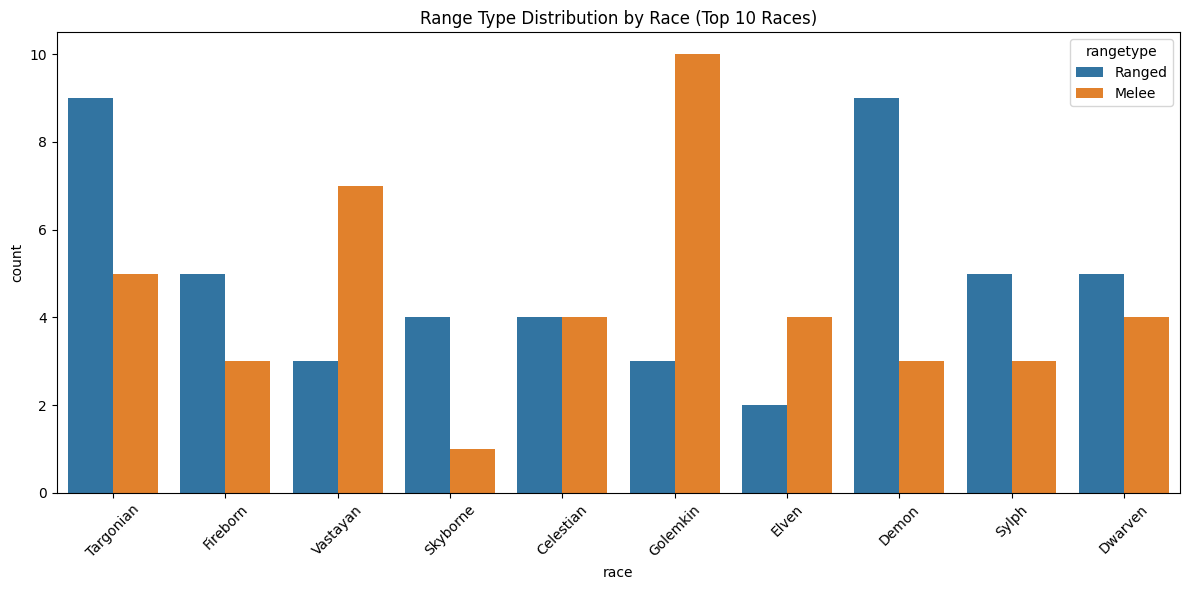

In [8]:
#    Race vs Range Type 
top_race_data = data[data['race'].isin(top_races)]
plt.figure(figsize=(12, 6))
sns.countplot(data=top_race_data, x='race', hue='rangetype')
plt.title('Range Type Distribution by Race (Top 10 Races)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

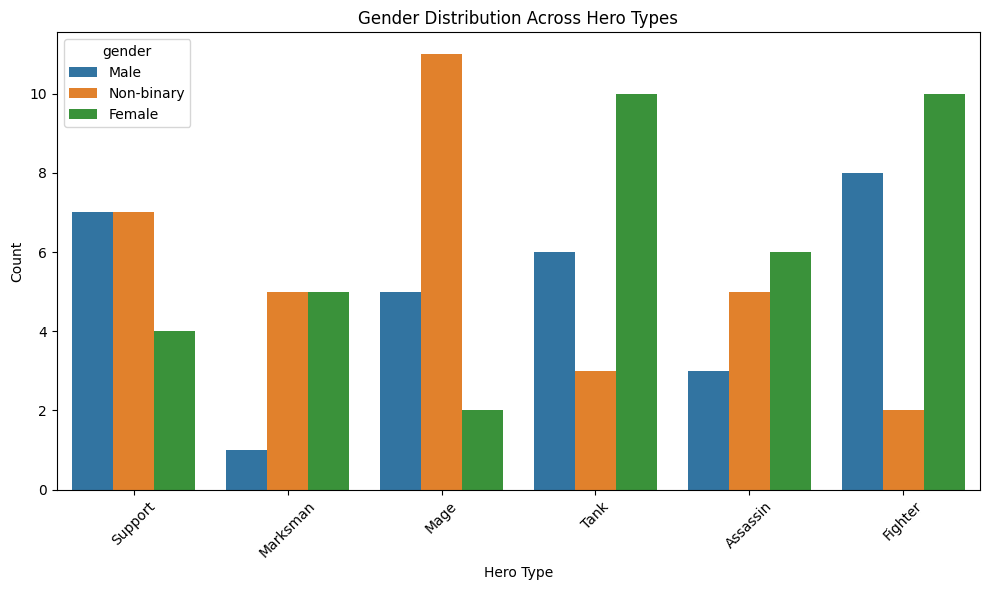

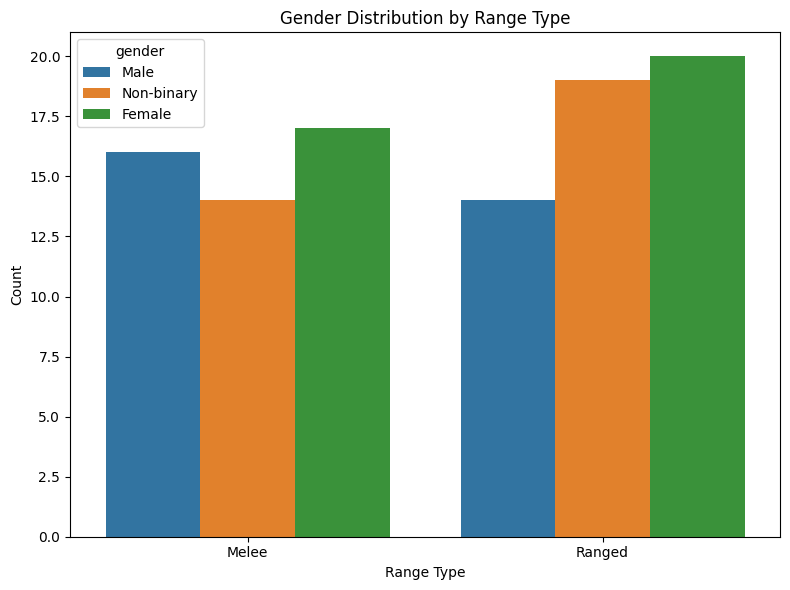

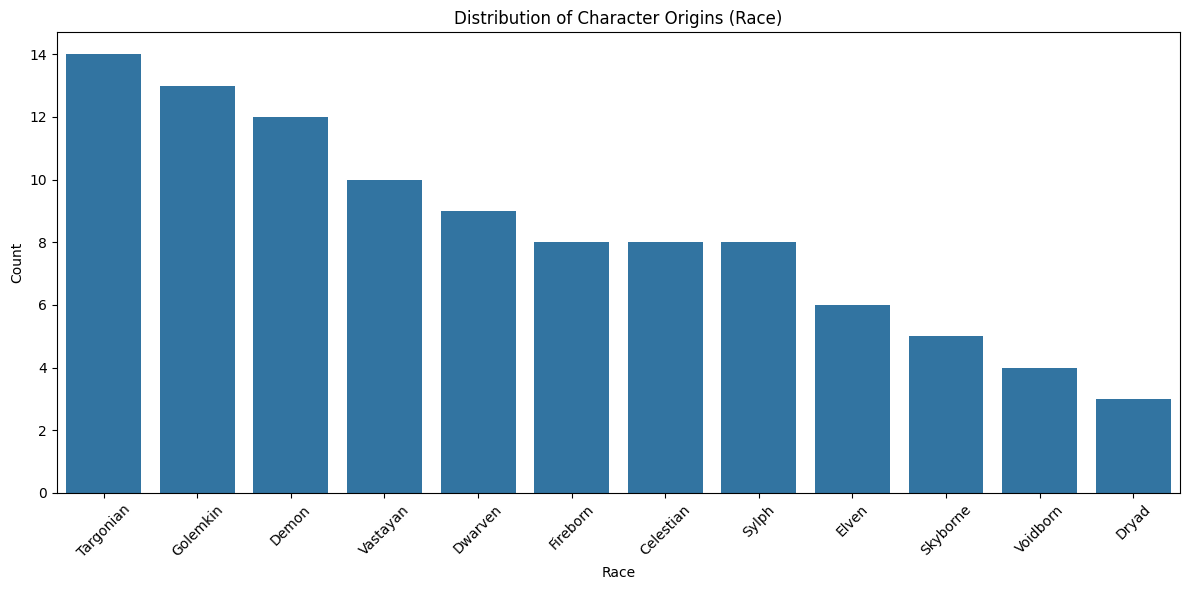

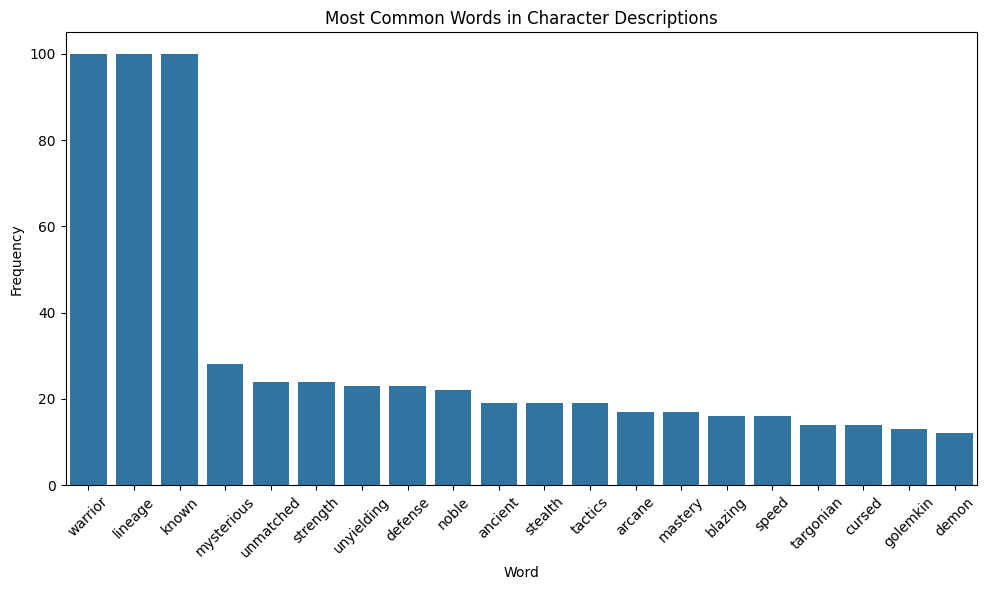

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Load the data
df = pd.read_csv("data1.csv")

# Clean and preprocess columns
df['gender'] = df['gender'].str.strip()
df['herotype'] = df['herotype'].str.strip()
df['alttype'] = df['alttype'].str.strip()
df['rangetype'] = df['rangetype'].str.strip()
df['race'] = df['race'].str.strip()

# ========== 1. Gender distribution across Hero Types ==========
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='herotype', hue='gender')
plt.title('Gender Distribution Across Hero Types')
plt.xlabel('Hero Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ========== 2. Gender distribution by Range Type ==========
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='rangetype', hue='gender')
plt.title('Gender Distribution by Range Type')
plt.xlabel('Range Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# ========== 3. Cultural Origin (Race) Distribution ==========
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='race', order=df['race'].value_counts().index)
plt.title('Distribution of Character Origins (Race)')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ========== 4. Most Common Words in Character Descriptions ==========
# Combine all descriptions into one string and clean it
descriptions = ' '.join(df['description'].dropna()).lower()
words = re.findall(r'\b[a-z]{3,}\b', descriptions)  # Only words with 3+ letters
filtered_words = [w for w in words if w not in ENGLISH_STOP_WORDS]

# Count word frequencies and take top 20
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

# Plot most common words
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts))
plt.title('Most Common Words in Character Descriptions')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

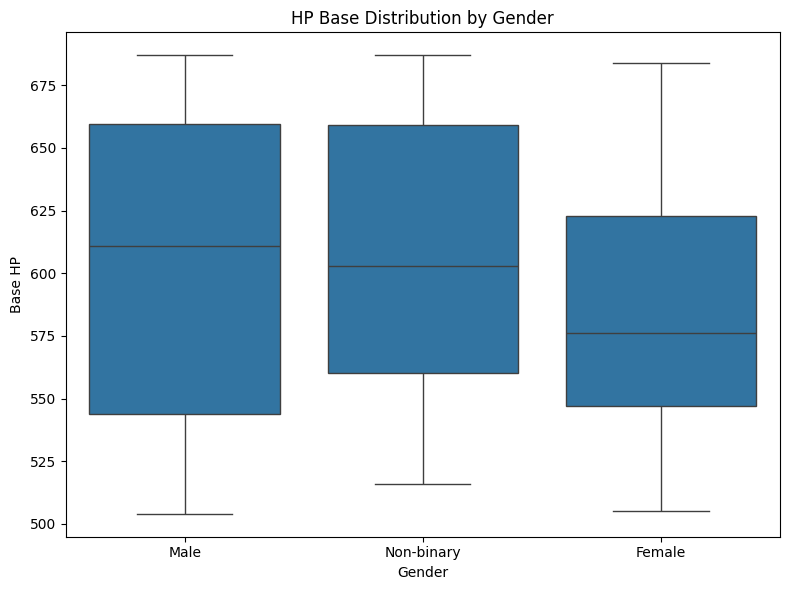

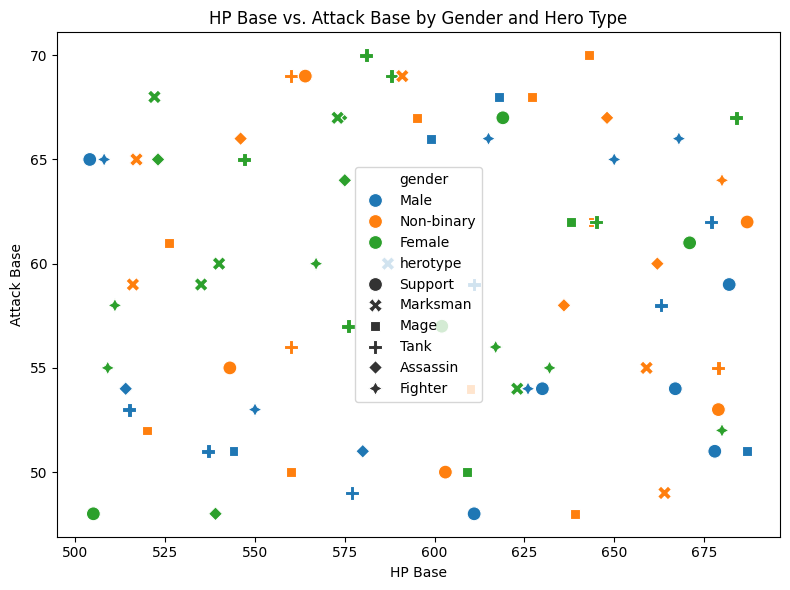

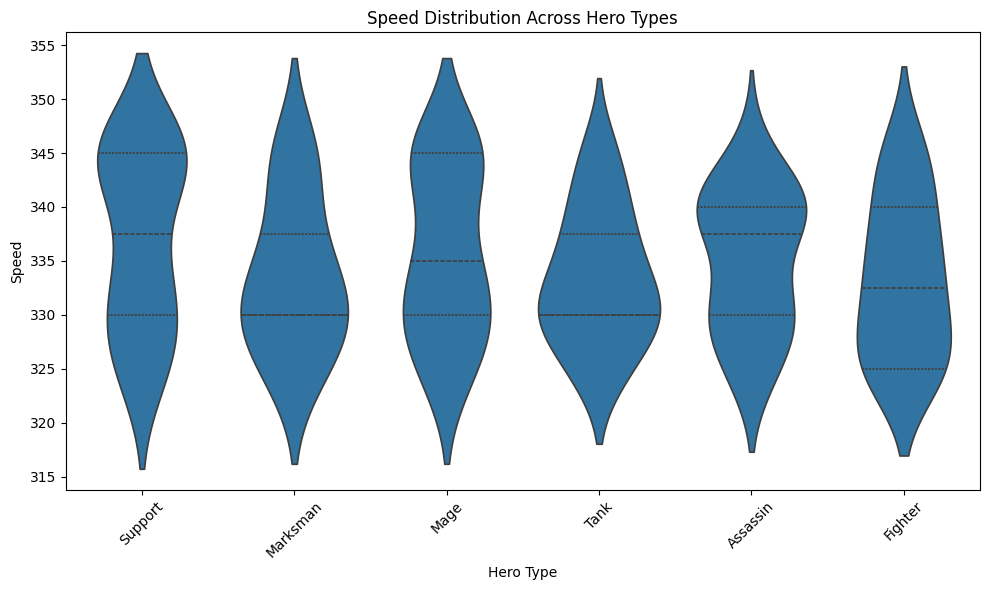

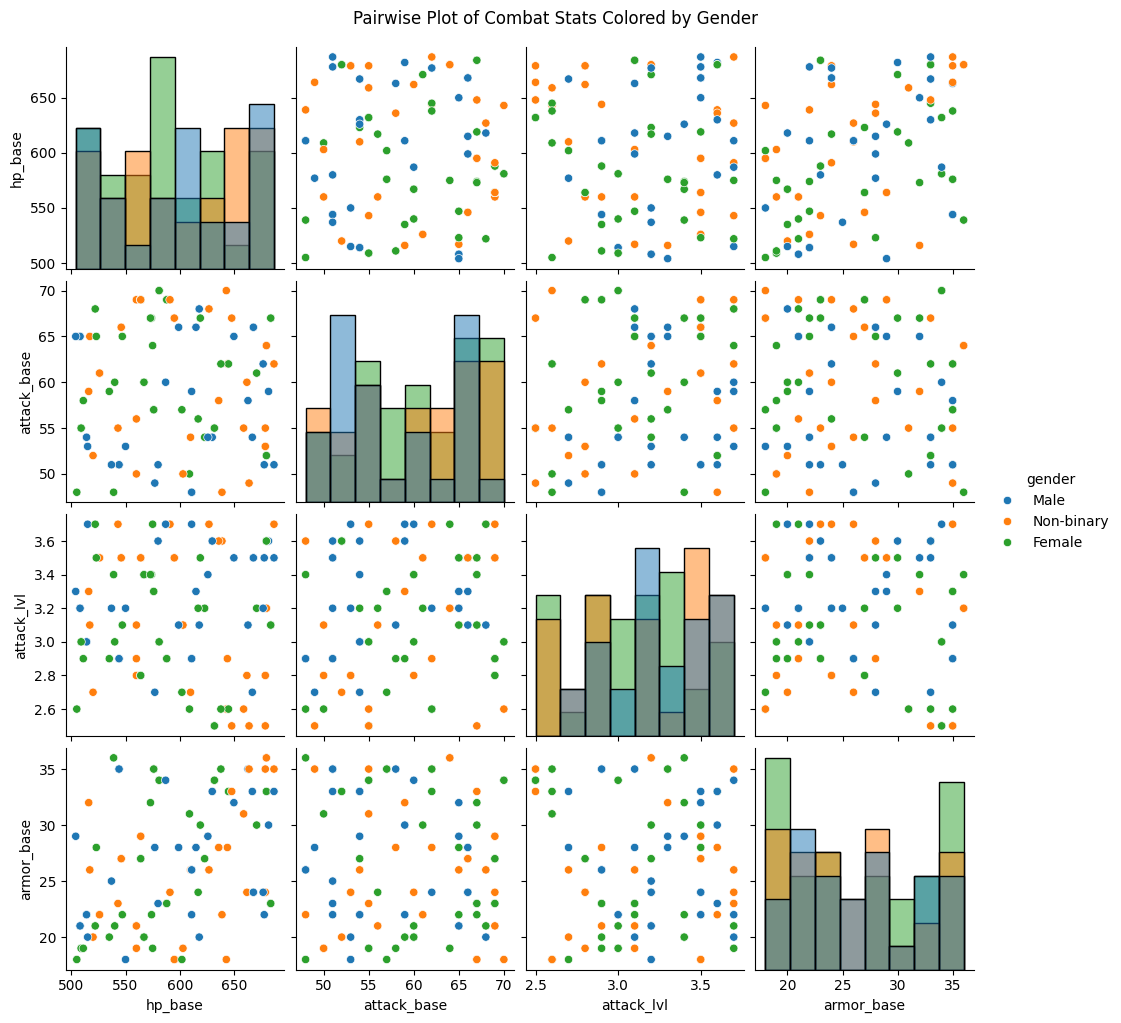

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load and clean the dataset
df = pd.read_csv("data1.csv")
df['gender'] = df['gender'].str.strip()
df['herotype'] = df['herotype'].str.strip()
df['alttype'] = df['alttype'].str.strip()
df['rangetype'] = df['rangetype'].str.strip()
df['race'] = df['race'].str.strip()

# Parse the 'stats' column (stringified dictionaries)
df['parsed_stats'] = df['stats'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else {})
stats_df = pd.json_normalize(df['parsed_stats'])
df_stats = pd.concat([df, stats_df], axis=1)

# ========== Boxplot: HP Base by Gender ==========
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_stats, x='gender', y='hp_base')
plt.title('HP Base Distribution by Gender')
plt.ylabel('Base HP')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

# ========== Scatterplot: HP Base vs. Attack Base ==========
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_stats, x='hp_base', y='attack_base', hue='gender', style='herotype', s=100)
plt.title('HP Base vs. Attack Base by Gender and Hero Type')
plt.xlabel('HP Base')
plt.ylabel('Attack Base')
plt.tight_layout()
plt.show()

# ========== Violin Plot: Speed by Hero Type ==========
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_stats, x='herotype', y='speed', inner='quartile')
plt.title('Speed Distribution Across Hero Types')
plt.xticks(rotation=45)
plt.xlabel('Hero Type')
plt.ylabel('Speed')
plt.tight_layout()
plt.show()

# ========== Pairplot: Combat Stats by Gender ==========
combat_features = ['hp_base', 'attack_base', 'attack_lvl', 'armor_base']
plot_df = df_stats[combat_features + ['gender']].dropna()
plot_df = plot_df[plot_df['gender'].apply(lambda x: isinstance(x, str))]
for col in combat_features:
    plot_df[col] = pd.to_numeric(plot_df[col], errors='coerce')
plot_df = plot_df.dropna()

sns.pairplot(plot_df, hue='gender', diag_kind='hist')
plt.suptitle('Pairwise Plot of Combat Stats Colored by Gender', y=1.02)
plt.show()

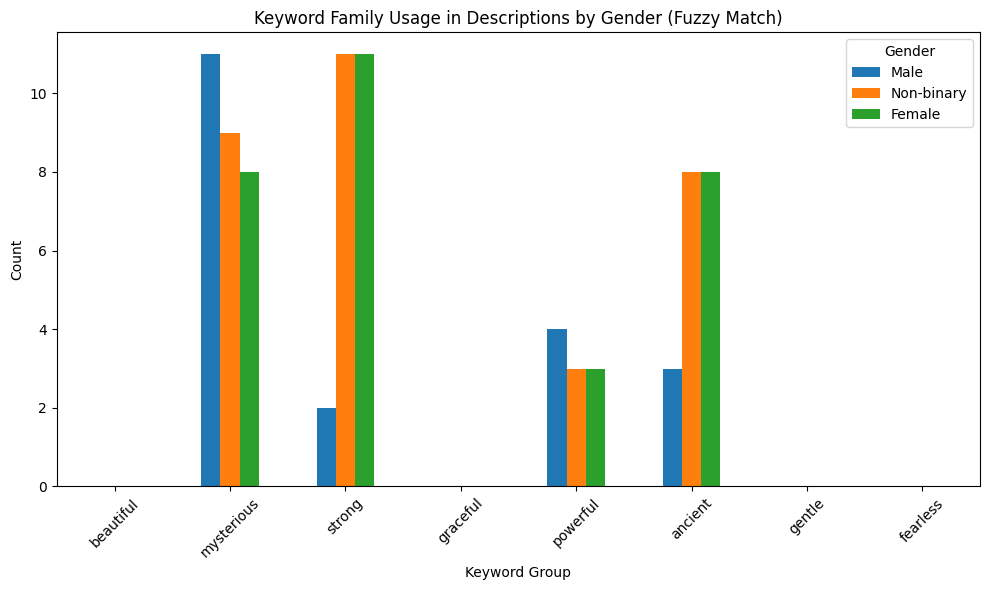

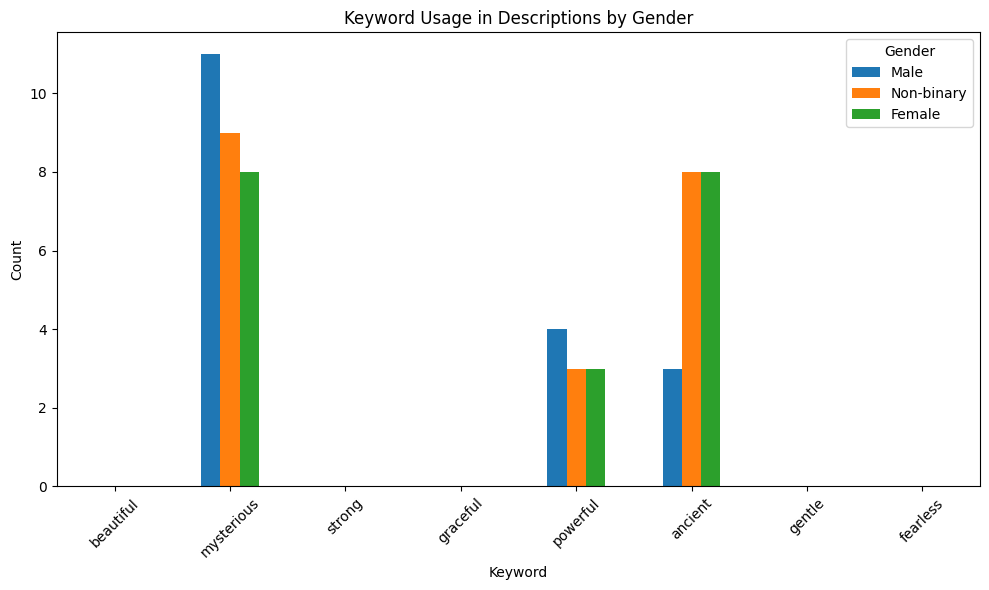

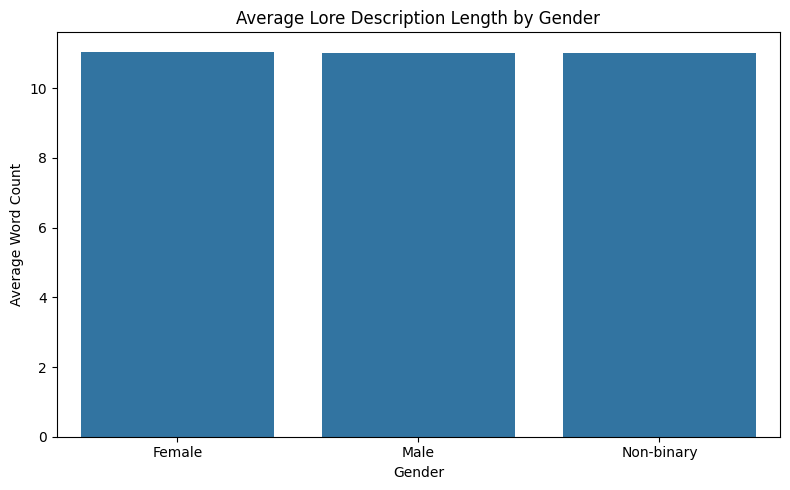

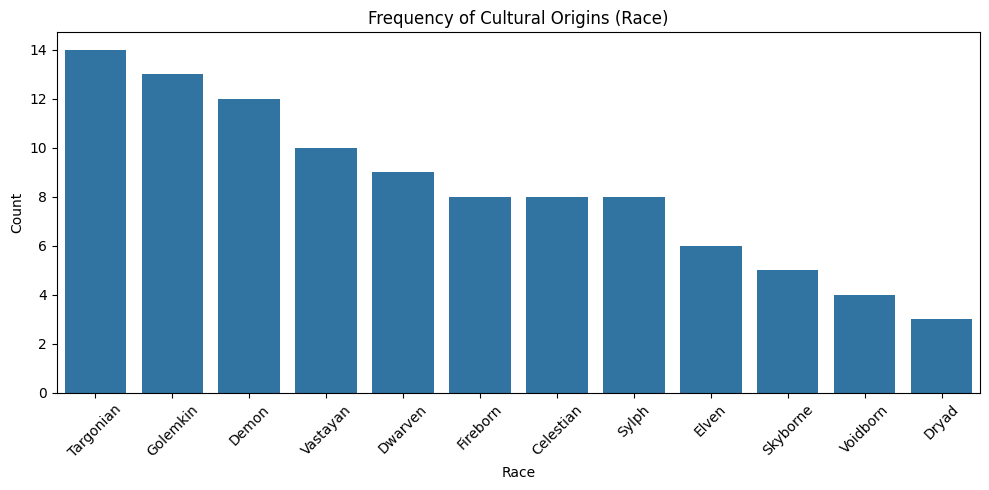

In [13]:
import pandas as pd
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("data1.csv")
df['gender'] = df['gender'].str.strip()
df['description'] = df['description'].fillna('').str.lower()

# Define keyword groups (to include variations)
keyword_groups = {
    "beautiful": ["beautiful", "beauty"],
    "mysterious": ["mysterious", "mystery"],
    "strong": ["strong", "strength", "strongest"],
    "graceful": ["graceful", "grace"],
    "powerful": ["powerful", "power"],
    "ancient": ["ancient"],
    "gentle": ["gentle", "kind", "soft"],
    "fearless": ["fearless", "brave", "unafraid"]
}

# Re-run count logic with fuzzy matching
fuzzy_counts = {kw: [] for kw in keyword_groups}
for base_kw, variations in keyword_groups.items():
    for gender in df['gender'].unique():
        count = df[df['gender'] == gender]['description'].apply(
            lambda x: any(variant in x for variant in variations)
        ).sum()
        fuzzy_counts[base_kw].append(count)

# Turn into DataFrame and plot
fuzzy_df = pd.DataFrame(fuzzy_counts, index=df['gender'].unique()).T
fuzzy_df.plot(kind='bar', figsize=(10, 6))
plt.title("Keyword Family Usage in Descriptions by Gender (Fuzzy Match)")
plt.xlabel("Keyword Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

# Turn into DataFrame
keyword_df = pd.DataFrame(keyword_counts, index=df['gender'].unique()).T
keyword_df.plot(kind='bar', figsize=(10, 6))
plt.title("Keyword Usage in Descriptions by Gender")
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

# 2. Average description length by gender
df['desc_length'] = df['description'].apply(lambda x: len(x.split()))
desc_len_avg = df.groupby('gender')['desc_length'].mean().reset_index()

# Plot average description lengths
plt.figure(figsize=(8, 5))
sns.barplot(data=desc_len_avg, x='gender', y='desc_length')
plt.title("Average Lore Description Length by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Word Count")
plt.tight_layout()
plt.show()

# 3. Cultural representation by race
race_counts = df['race'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=race_counts.index, y=race_counts.values)
plt.title("Frequency of Cultural Origins (Race)")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()